In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd

In [229]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [236]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


2016-08-23 00:00:00
Query Date:  2016-08-23


In [34]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date,func.sum(Measurement.prcp)).\
    group_by(Measurement.date).\
    filter(Measurement.date > '2016-08-23').all()
precipitation_scores


[('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.3599999999999999),
 ('2016-09-28

In [35]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame({
    'date':[precipitation_scores[i][0] for i in range(len(precipitation_scores))],
    'prcp':[precipitation_scores[i][1] for i in range(len(precipitation_scores))]
})
# Sort the dataframe by date
df.sort_values(by=['date'])
df.set_index('date')


,prcp
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
2016-08-29,1.46
2016-08-30,0.07
2016-08-31,3.18
2016-09-01,0.03


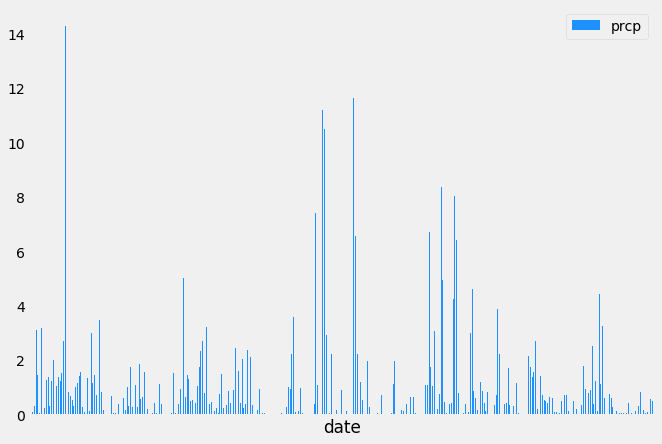

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='prcp', kind= 'bar', rot=0, color='dodgerblue', figsize=(10,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.legend(loc='best')
plt.grid()
fig_size = plt.rcParams["figure.figsize"]


# Set figure width to 3 and height to 9
fig_size[0] = 4
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size;



![precipitation](Images/precipitation.png)

In [240]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = df['prcp'].count()
mean = df['prcp'].mean()
std = df['prcp'].std()
min_p = df['prcp'].min()
max_p = df['prcp'].max()
quartile = df.prcp.quantile([0.25,0.5,0.75])
quartile[0.75]
max_p
# summary = pd.DataFrame(
#     {'count','mean','std','min','25%','50%','75%','max']:
#      ['precipitation',count,mean,std,min_p,quartile[0.25],quartile[0.5],quartile[0.75],max_p]})
summary = pd.DataFrame({
    'count':[count],
    'mean':[mean],
    'std':[std],
    'min':[min_p],
    '25%':[quartile[0.25]],
    '50%':[quartile[0.5]],
    '75%':[quartile[0.75]],
    'max':[max_p]})

summary = summary.transpose()
summary.rename(index=str, columns={0: "precipitation"})

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [241]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement).group_by(Measurement.station).count()

9

In [292]:
session.query(Measurement.tobs).filter(Measurement.date > '2016-08-23').all()

[(79.0),
 (80.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (81.0),
 (80.0),
 (79.0),
 (75.0),
 (79.0),
 (76.0),
 (76.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (78.0),
 (78.0),
 (75.0),
 (79.0),
 (80.0),
 (79.0),
 (81.0),
 (77.0),
 (77.0),
 (78.0),
 (76.0),
 (82.0),
 (81.0),
 (78.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (80.0),
 (80.0),
 (79.0),
 (79.0),
 (79.0),
 (80.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0),
 (75.0),
 (80.0),
 (80.0),
 (79.0),
 (80.0),
 (79.0),
 (78.0),
 (78.0),
 (80.0),
 (81.0),
 (79.0),
 (77.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (72.0),
 (71.0),
 (72.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (75.0),
 (76.0),
 (76.0),
 (75.0),
 (72.0),
 (74.0),
 (75.0),
 (73.0),
 (76.0),
 (75.0),
 (68.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (71.0),
 (68.0),
 (67.0),
 (69.0),
 (73.0),
 (70.0),
 (70.0),
 (70.0),
 (66.0),
 

In [242]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [243]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [244]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').all()
station_tobs



[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [245]:
df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


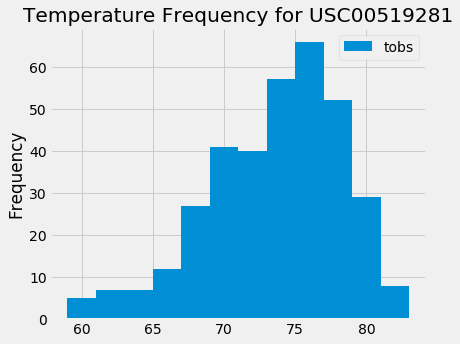

In [250]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
columns=['temperature']
df = pd.DataFrame(station_tobs,columns=columns)
df.sort_values(by=['temperature'])
df.set_index('temperature')
df.hist(bins=12,label='tobs')
plt.legend()
plt.ylabel("Frequency")
plt.title('Temperature Frequency for USC00519281')
fig_size = plt.rcParams["figure.figsize"]


# Set figure width to 3 and height to 9
fig_size[0] = 4
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size;




In [176]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [251]:
temps=calc_temps('2017-02-28', '2017-03-05')
temps

[(64.0, 72.02777777777777, 78.0)]

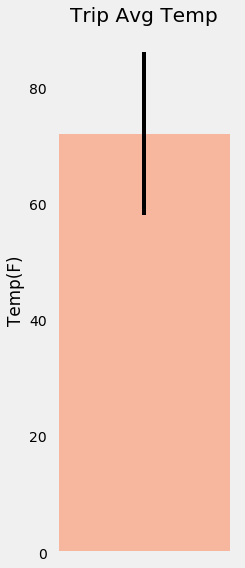

In [253]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar(x=1,height=temps[0][1],yerr=temps[0][2]-temps[0][0],color='coral',alpha=0.5)
fig_size = plt.rcParams["figure.figsize"]


# Set figure width to 3 and height to 9
fig_size[0] = 3
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.grid(False)
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


In [265]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station, Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).\
    group_by(Measurement.station).\
    filter(Station.station==Measurement.station).\
    filter(Measurement.date > '2017-02-28').\
    filter(Measurement.date < '2017-03-05').\
    order_by(func.sum(Measurement.prcp).desc()).all()


[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  4.27),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.19),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  3.14),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2.98),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2.3899999999999997),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.32),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.12)]

In [44]:
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= '2012-02-28').filter(Measurement.date <= '2012-03-05').all()

[(62.0, 69.57142857142857, 74.0)]

## Optional Challenge Assignment

In [46]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [48]:
normals = [daily_normals(f"06-0{str(i)}")for i in range(1,7)]
normals

[[(64.0, 74.6140350877193, 81.0)],
 [(65.0, 74.4, 81.0)],
 [(65.0, 74.03448275862068, 80.0)],
 [(65.0, 73.81818181818181, 81.0)],
 [(68.0, 74.85454545454546, 81.0)],
 [(70.0, 75.17543859649123, 80.0)]]

In [92]:
daily_normals_df = pd.DataFrame({
    'date': [f"2018-06-0{str(i)}"for i in range(1,7)],
    'tmin': [normals[i][0][0] for i in range(len(normals))],
    'tavg': [normals[i][0][1] for i in range(len(normals))],
    'tmax': [normals[i][0][2] for i in range(len(normals))]
    
})
daily_normals_df = daily_normals_df.set_index('date')

In [93]:
daily_normals_df

,tmin,tavg,tmax
date,,,
2018-06-01,64.0,74.614035,81.0
2018-06-02,65.0,74.400000,81.0
2018-06-03,65.0,74.034483,80.0
2018-06-04,65.0,73.818182,81.0
2018-06-05,68.0,74.854545,81.0
2018-06-06,70.0,75.175439,80.0


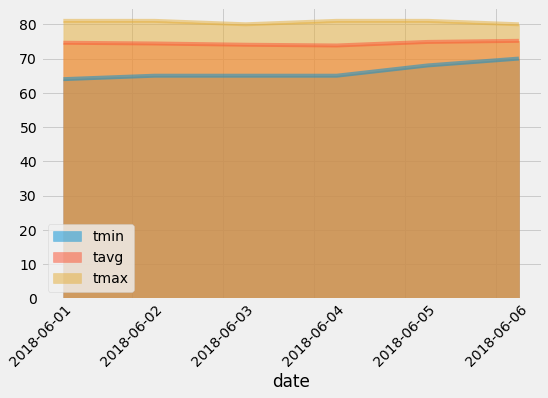

In [110]:
ax = daily_normals_df.plot.area(stacked=False, figsize=(8,5))
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end))
ax.set_xticklabels(daily_normals_df.index, rotation=45);